0. Описание задачи
Задача заключается в том, чтобы предсказать тип личности человека на основе предоставленных данных. Датасет состоит из информации, которая отражает личные качества и возможные поведенческие паттерны участников. Основная цель — разработать модель машинного обучения, которая способна на основе характеристик предсказывать категорию личности, используя данные о личных качествах и поведении.

age: непрерывная переменная, отражающая возраст человека.

Gender: Категориальная переменная, указывающая пол человека. Возможные значения: «Мужской» и «Женский».

Education: Двоичная переменная, значение 1 указывает на то, что человек имеет как минимум высшее образование (или выше), а 0 указывает на то, что он имеет высшее, среднее или необразованное образование.

Interest: Категориальная переменная, отражающая основную сферу интересов индивида.

Introversion Score: Непрерывная переменная от 0 до 10, отражающая склонность человека к интроверсии в сравнении с экстраверсией. Более высокие баллы указывают на большую склонность к экстраверсии.

Sensing Score:  Непрерывная переменная от 0 до 10, отражающая предпочтение индивида к сенситивности по сравнению с интуицией. Более высокие баллы указывают на предпочтение интуиции.

Thinking Score: Непрерывная переменная от 0 до 10, отражающая предпочтения человека в отношении мышления по сравнению с чувствами. Более высокие баллы указывают на предпочтение мышления.

Judging Score Непрерывная переменная от 0 до 10, отражающая предпочтение человека судить в сравнении с восприятием. Более высокие баллы указывают на предпочтение суждения.

Personality: Цель, содержащая тип личности человека.

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

1. Чтение данных
Необходимо загрузить датасет и проанализировать структуру данных, включая столбцы и типы данных.

In [34]:

data = pd.read_csv('data.csv') 
data.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


In [35]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128061 non-null  float64
 1   Gender              128061 non-null  object 
 2   Education           128061 non-null  int64  
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Interest            128061 non-null  object 
 8   Personality         128061 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 8.8+ MB


2. Визуализация данных и вычисление основных характеристик
Построим визуализацию для некоторых признаков, чтобы лучше понять распределение данных.

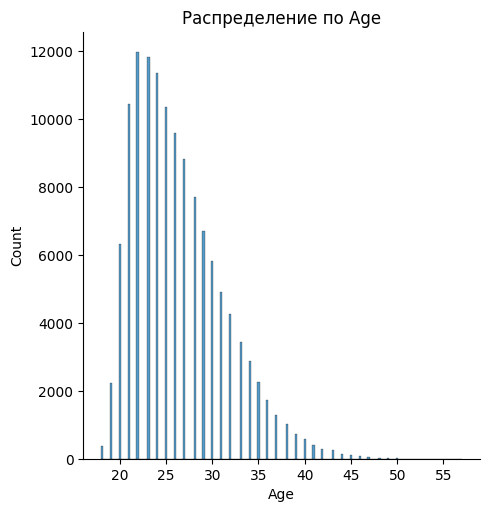

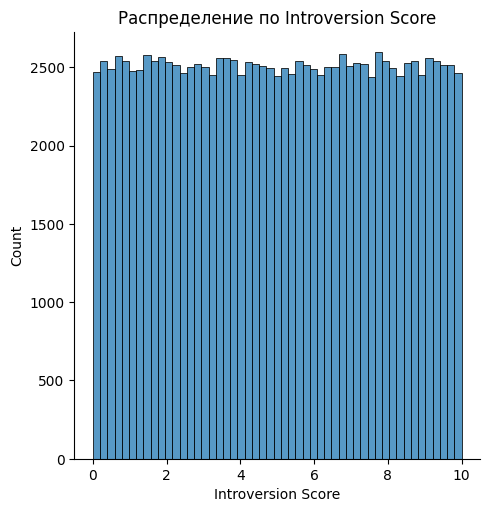

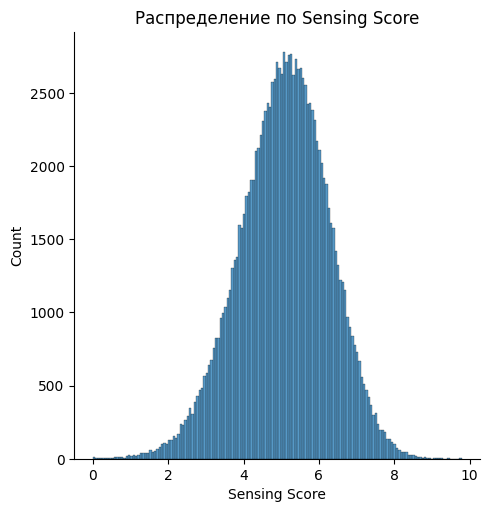

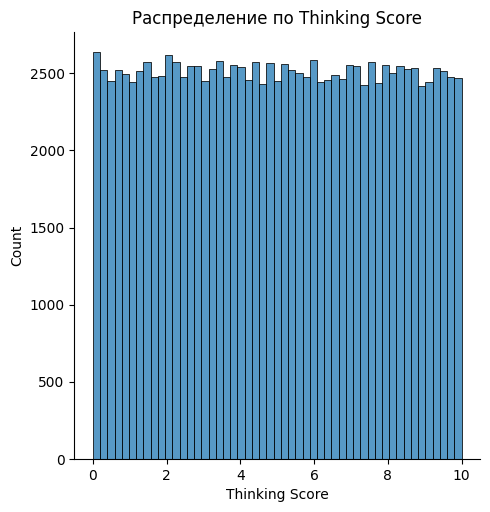

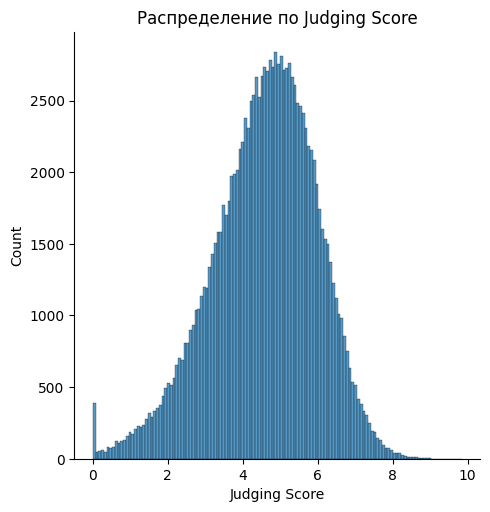

In [36]:
cols = data.select_dtypes('float64')

for col in cols:
    sns.displot(data[col])
    plt.title(f'Распределение по {col}')
    plt.show()

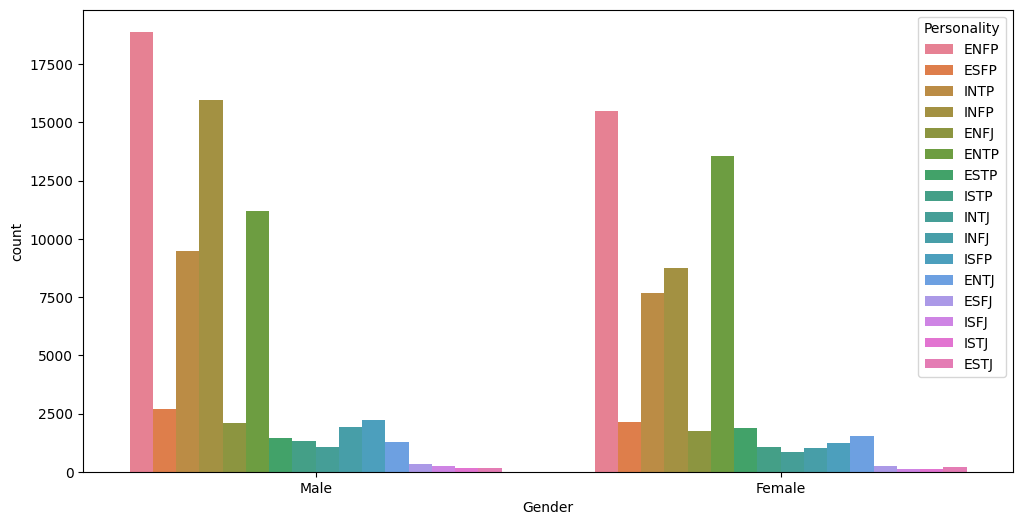

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Gender', hue='Personality', data=data)
plt.show()

Далее рассчитаем:

Среднее значение для каждого признака
Дисперсию (разброс значений)
Корреляционную матрицу, чтобы увидеть, какие признаки имеют сильную корреляцию

Обработка пропущенных значений
Проверим датасет на наличие пропусков.

In [38]:
data.isnull().sum()

Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Personality           0
dtype: int64

In [39]:
print(data.describe())

                 Age      Education  Introversion Score  Sensing Score  \
count  128061.000000  128061.000000       128061.000000  128061.000000   
mean       26.349091       0.411156            4.996387       5.081893   
std         4.908022       0.492045            2.888636       1.183236   
min        18.000000       0.000000            0.000040       0.000000   
25%        23.000000       0.000000            2.490710       4.315659   
50%        25.000000       0.000000            4.993640       5.124169   
75%        29.000000       1.000000            7.500170       5.892288   
max        57.000000       1.000000            9.999990       9.788815   

       Thinking Score  Judging Score  
count   128061.000000  128061.000000  
mean         4.988040       4.578293  
std          2.886018       1.391582  
min          0.000050       0.000000  
25%          2.488630       3.709353  
50%          4.984180       4.690653  
75%          7.492550       5.561229  
max          9.999970

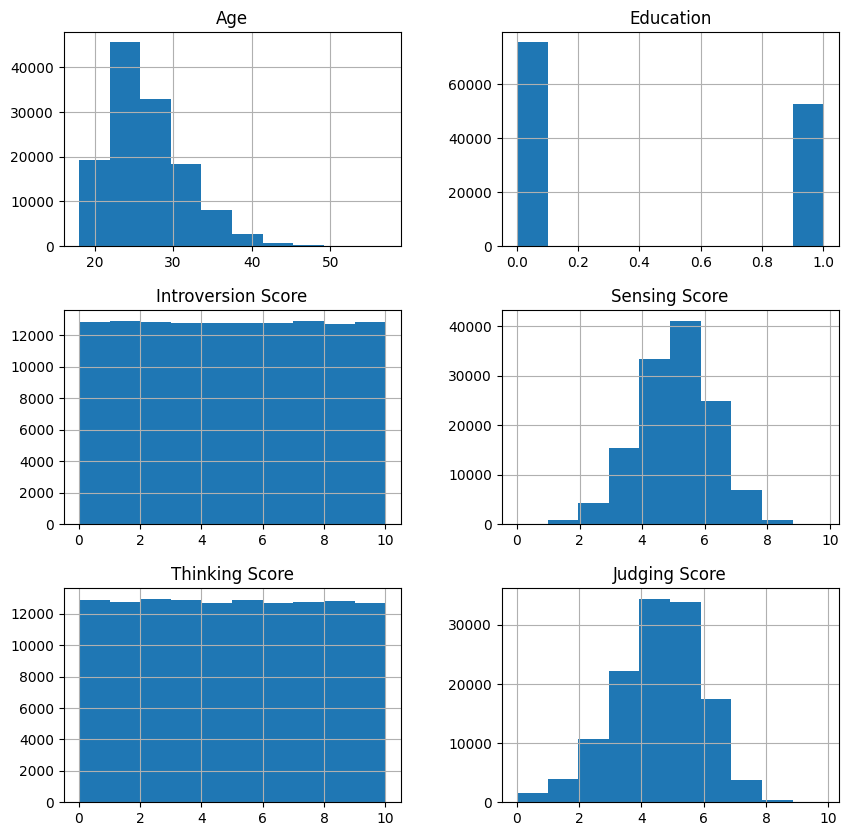

In [40]:
data.hist(figsize=(10, 10))
plt.show()

Корреляционная матрица

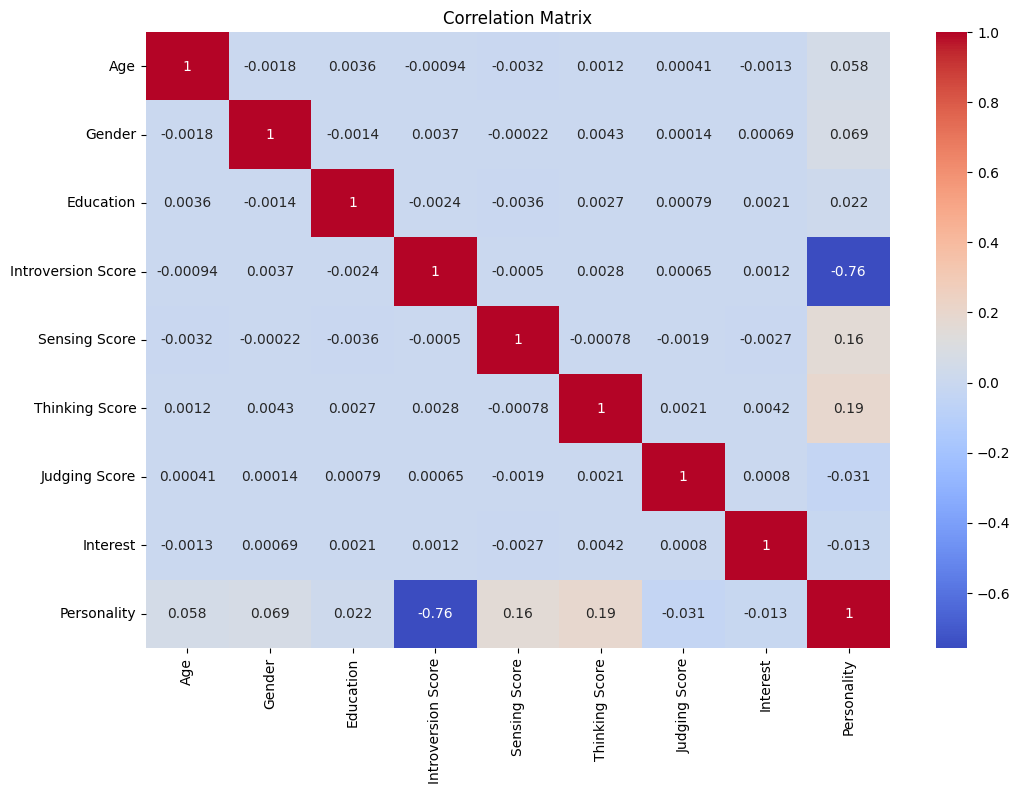

In [42]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

4. Обработка категориальных признаков.  Давайте вручную изменим столбец «Personality» со строки на числа.

In [43]:
df.replace({'Personality' : { 'ENFP' : 0, 'ENTP' : 1, 'INFP' : 2,'INTP':3,'ESFP':4,
                              'ENFJ':5, 'ISFP':6,'ESTP':7, 'INFJ':8, 'ENTJ':9,'ISTP':10,
                              'INTJ':11,'ESFJ':12,'ESTJ':13,'ISFJ':14,'ISTJ':15 }}, inplace=True)

In [44]:
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == type(object):
        df[column] = le.fit_transform(df[column])

In [45]:
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,1,0,9.47080,7.141434,6.03696,4.360278,4,1
1,27.0,0,0,5.85392,6.160195,0.80552,4.221421,2,5
2,21.0,0,0,7.08615,3.388433,2.66188,5.127320,4,1
3,28.0,1,0,2.01892,4.823624,7.30625,5.986550,1,11
4,36.0,0,1,9.91703,4.755080,5.31469,4.677213,3,1


Разделим данные на обучающую и тестовую выборки, чтобы затем оценить качество модели.Используем метод тренировки K NN ближайших соседей.

In [51]:
X = df.drop(['Personality'], axis=1)
y = df['Personality']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Запуск классификатора. попробуем разные модели.

In [65]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [66]:
y_pred = classifier.predict(X_test)

In [67]:
from sklearn.metrics import  accuracy_score
acc3 = accuracy_score(y_test, y_pred)

In [68]:
print(f"Accuracy score: {acc3}")

Accuracy score: 0.8083760639267029


Заключение
В этом блокноте мы изучили связь между демографическими факторами и типами личности. Мы визуализировали распределение типов личности и интересов, а также построили прогностическую модель для классификации типов личности на основе других признаков.